In [6]:
from melee_dataset import MeleeDataset
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from torch.distributions import Categorical
from torch.distributions import Bernoulli,Normal
import matplotlib.pyplot as plt
from PolicyNet import PolicyNet
import torch.nn.functional as F
from Agents.BCAgent import BCAgent

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# train_dataset = MeleeDataset(data_path="data/train_mini_515")
train_dataset = MeleeDataset(data_path="data/train_mini_100")
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = MeleeDataset(data_path="data/val_mini_20")
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)


In [3]:
print(f"obs_dim: {train_dataset[0][0].shape}")
print(f"act_dim: {train_dataset[0][1].shape}")

obs_dim: torch.Size([70])
act_dim: torch.Size([17])


In [7]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
obs_dim = train_dataset[0][0].shape[0]
act_dim = train_dataset[0][1].shape[0]
policy  = PolicyNet(obs_dim, act_dim).to(device)
# opt     = optim.Adam(policy.parameters(), lr=1e-3)
agent = BCAgent(obs_dim, act_dim, device)

Using device: cuda


In [8]:
losses = []
val_losses = []
for epoch in range(10):
    total_loss = 0.0
    for i, (states, actions, next_states) in tqdm(enumerate(train_loader)):
        states = states.to(device)       # [B, obs_dim]
        actions = actions.to(device)     # [B] integers in [0…act_dim-1]
        next_states = next_states.to(device)

        loss = agent.train(states, actions, next_states)

        total_loss += loss * states.shape[0]
    avg_loss = total_loss / len(train_dataset)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1} — Loss: {avg_loss:.4f}")

    val_loss = 0.0  
    for i, (states, actions, next_states) in tqdm(enumerate(val_loader)):
        states = states.to(device)       # [B, obs_dim]
        actions = actions.to(device)     # [B] integers in [0…act_dim-1]
        next_states = next_states.to(device)

        val_loss += agent.validate(states, actions)
    avg_val_loss = val_loss / len(val_dataset)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1} — Val Loss: {avg_val_loss:.4f}")


0it [00:00, ?it/s]

9072it [00:31, 285.78it/s]


Epoch 1 — Loss: -33.4480


1845it [00:02, 819.02it/s]


Epoch 1 — Val Loss: -66.0735


9072it [00:31, 288.27it/s]


Epoch 2 — Loss: -88.2702


1845it [00:02, 824.82it/s]


Epoch 2 — Val Loss: -117.0179


9072it [00:31, 285.47it/s]


Epoch 3 — Loss: -149.0515


1845it [00:02, 791.79it/s]


Epoch 3 — Val Loss: -189.7015


9072it [00:32, 277.18it/s]


Epoch 4 — Loss: -218.4158


1845it [00:02, 821.20it/s]


Epoch 4 — Val Loss: -226.0588


9072it [00:31, 284.14it/s]


Epoch 5 — Loss: -223.3179


1845it [00:02, 833.83it/s]


Epoch 5 — Val Loss: -227.0991


9072it [00:30, 294.77it/s]


Epoch 6 — Loss: -228.4222


1845it [00:02, 832.41it/s]


Epoch 6 — Val Loss: -224.6306


9072it [00:32, 279.38it/s]


Epoch 7 — Loss: -228.7566


1845it [00:02, 841.85it/s]


Epoch 7 — Val Loss: -213.7483


9072it [00:32, 282.95it/s]


Epoch 8 — Loss: -229.2009


1845it [00:02, 807.83it/s]


Epoch 8 — Val Loss: -230.8926


9072it [00:30, 293.79it/s]


Epoch 9 — Loss: -229.6788


1845it [00:02, 819.35it/s]


Epoch 9 — Val Loss: -231.7196


9072it [00:31, 284.94it/s]


Epoch 10 — Loss: -230.0076


1845it [00:02, 824.28it/s]

Epoch 10 — Val Loss: -222.8637


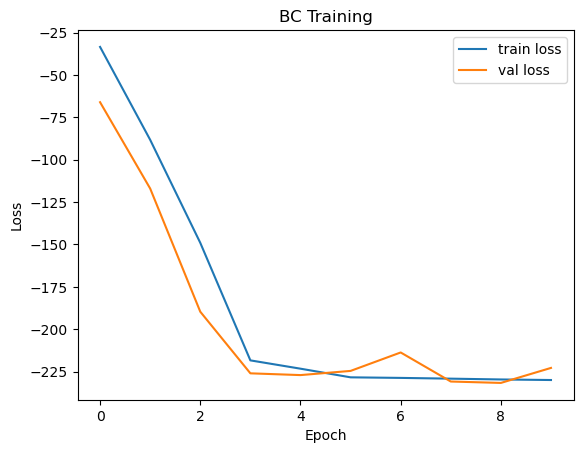

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("BC Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="val loss")
plt.legend()
plt.show()



In [11]:
# Save the trained model
torch.save(policy.state_dict(), "bc_100_train.pth")
print("Model saved to trained_policy.pth")


Model saved to trained_policy.pth
